### ANALYSIS OF EFFECTS OF VARIOUS ACTIVITY ON MY PERSONAL HEART RATE VARIABILITY (SDNN) 

**Heart Rate Variability (HRV) and SDNN: An In-depth Introduction**

Heart Rate Variability (HRV) refers to the variations in time intervals between successive heartbeats. These variations are often seen as a reflection of the autonomic nervous system's (ANS) influence on heart function. The ANS is responsible for regulating various involuntary body functions, including heart rate, digestion, and respiratory rate, and it consists of two main branches: the sympathetic (often called the "fight or flight" system) and the parasympathetic (often called the "rest and digest" system). 

SDNN, which stands for Standard Deviation of Normal-to-Normal intervals, is one of the primary time-domain measures used to quantify HRV. In simple terms, it measures the variability or dispersion of individual heartbeats around the average heart rate over a specified period. A higher SDNN indicates greater variability, while a lower SDNN indicates lesser variability.

The importance of SDNN in HRV analysis stems from several key areas:

1. **Cardiovascular Health:** Studies have shown that a decreased HRV, reflected by a lower SDNN, is associated with increased morbidity and mortality in various populations, especially after cardiac events like myocardial infarction.

2. **Autonomic Nervous System Balance:** A healthy balance between the sympathetic and parasympathetic branches of the ANS is essential for overall wellness. SDNN can provide insight into this balance, with higher values often indicating better autonomic function.

3. **Stress and Recovery:** HRV and SDNN can be useful indicators of stress and recovery. Chronic stress may lead to decreased HRV, suggesting an overactive sympathetic system and underactive parasympathetic system. Monitoring SDNN can help individuals gauge their stress levels and adjust their activities or interventions accordingly.

4. **Predictive Value:** Reduced HRV, and by extension lower SDNN, has been linked with an increased risk of various adverse health outcomes, including cardiovascular diseases, diabetes, and even mental health disorders.

5. **Utility in Diverse Populations:** The value of HRV and SDNN isn't limited to those with health conditions. Athletes, for instance, use HRV and SDNN measurements to optimize training and recovery, ensuring they neither overtrain nor undertrain.

In summary, SDNN in HRV provides a window into the intricate interactions of the heart with the autonomic nervous system. By understanding and monitoring this metric, individuals and healthcare professionals can gain crucial insights into overall health, stress levels, recovery, and the risk of potential adverse outcomes.

**Importing necessary libraries**

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import statistics
from ydata_profiling import ProfileReport

/Users/obinnadinneya/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/obinnadinneya/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [2]:
%matplotlib inline

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

5.9.0


In [4]:
import cufflinks as cf

In [5]:
init_notebook_mode(connected=True)

In [6]:
cf.go_offline()

**Reading in the datasets**

In [7]:
apple_avtivitydata = pd.read_csv("./activity_sep21_sep23.csv")
sleep_hrv_data = pd.read_csv('./sleepandhrv_sep21-sep23.csv')

In [8]:
sleep_hrv_data

,Date,Heart rate variability (SDNN)(ms),Resting heart rate(count/min),Time REM(hr),Time asleep(hr),Time awake(hr),Time core(hr),Time deep(hr),Time in bed(hr)
0,2021-09-17 16:57:50 - 2021-09-17 21:11:44,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-18 00:03:28 - 2021-09-18 16:19:43,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-18 00:40:27 - 2021-09-18 00:41:27,39.518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-18 11:19:46 - 2021-09-18 11:20:52,43.275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-18 11:26:38 - 2021-09-18 11:27:44,39.693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
14935,2023-09-17 06:17:15 - 2023-09-17 06:22:03,NaN,NaN,NaN,NaN,0.080,NaN,NaN,NaN
14936,2023-09-17 06:22:03 - 2023-09-17 06:29:44,NaN,NaN,NaN,0.128,NaN,NaN,NaN,NaN
14937,2023-09-17 06:29:45 - 2023-09-17 06:35:01,NaN,NaN,NaN,NaN,0.088,NaN,NaN,NaN
14938,2023-09-17 06:35:02 - 2023-09-17 06:54:15,NaN,NaN,NaN,0.320,NaN,NaN,NaN,NaN


In [9]:
sleep_hrv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               14940 non-null  object 
 1   Heart rate variability (SDNN)(ms)  4777 non-null   float64
 2   Resting heart rate(count/min)      740 non-null    float64
 3   Time REM(hr)                       903 non-null    float64
 4   Time asleep(hr)                    1058 non-null   float64
 5   Time awake(hr)                     1789 non-null   float64
 6   Time core(hr)                      2339 non-null   float64
 7   Time deep(hr)                      697 non-null    float64
 8   Time in bed(hr)                    3114 non-null   float64
dtypes: float64(8), object(1)
memory usage: 1.0+ MB


In [10]:
#Changing the name of the date column to Date&Timestamp
sleep_hrv_data.rename(columns={'Date':'Date&Timestamp'},inplace=True)

In [11]:
#Creating a Date Column
sleep_hrv_data['Date'] = sleep_hrv_data['Date&Timestamp'].apply(lambda x : x.split(" ")[0])

In [12]:
#Converting the object datatype to datetime
sleep_hrv_data['Date'] = pd.to_datetime(sleep_hrv_data['Date'])
sleep_hrv_data['Date'][0]

Timestamp('2021-09-17 00:00:00')

In [13]:
sleep_hrv_data['Date'].nunique()

731

In [14]:
#Grouped data by date and aggregaged 
df = sleep_hrv_data[['Date','Time REM(hr)','Time core(hr)','Time deep(hr)','Time asleep(hr)','Time awake(hr)','Time in bed(hr)']]
sleep_df = df.groupby('Date').sum()
sleep_df.head(10)

,Time REM(hr),Time core(hr),Time deep(hr),Time asleep(hr),Time awake(hr),Time in bed(hr)
Date,,,,,,
2021-09-17,0.0,0.0,0.0,0.000,0.0,0.000
2021-09-18,0.0,0.0,0.0,0.000,0.0,0.000
2021-09-19,0.0,0.0,0.0,1.167,0.0,9.463
2021-09-20,0.0,0.0,0.0,0.000,0.0,0.208
2021-09-21,0.0,0.0,0.0,1.175,0.0,5.602
2021-09-22,0.0,0.0,0.0,6.984,0.0,0.183
2021-09-23,0.0,0.0,0.0,4.617,0.0,0.305
2021-09-24,0.0,0.0,0.0,0.000,0.0,0.000
2021-09-25,0.0,0.0,0.0,0.000,0.0,0.000


In [15]:
sleep_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time REM(hr),731.0,0.410829,0.708838,0.0,0.0000,0.00,0.913,2.541
Time core(hr),731.0,1.128324,1.855433,0.0,0.0000,0.00,2.858,6.291
Time deep(hr),731.0,0.237473,0.430775,0.0,0.0000,0.00,0.387,1.924
Time asleep(hr),731.0,0.966116,2.251216,0.0,0.0000,0.00,0.000,10.842
Time awake(hr),731.0,0.156544,0.386174,0.0,0.0000,0.00,0.100,3.434
Time in bed(hr),731.0,7.743413,6.191447,0.0,2.8045,7.11,12.050,30.904


In [16]:
#Grouped data by date and aggregaged RHR
df = sleep_hrv_data[['Date','Resting heart rate(count/min)']]
RHR_df = df.groupby('Date').mean()
RHR_df.head(10)

,Resting heart rate(count/min)
Date,
2021-09-17,64.0
2021-09-18,67.0
2021-09-19,72.0
2021-09-20,60.0
2021-09-21,58.0
2021-09-22,59.0
2021-09-23,59.0
2021-09-24,65.0
2021-09-25,71.0


In [17]:
#Grouped data by date and aggregaged HRV
df = sleep_hrv_data[['Date','Heart rate variability (SDNN)(ms)']]
HRV_df = df.groupby('Date').mean()
HRV_df.head(10)

,Heart rate variability (SDNN)(ms)
Date,
2021-09-17,NaN
2021-09-18,56.13380
2021-09-19,26.41550
2021-09-20,29.84925
2021-09-21,34.03700
2021-09-22,55.21450
2021-09-23,36.44950
2021-09-24,36.22750
2021-09-25,27.56180


In [18]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)

In [19]:
##join these columns by the dataframes 
sleep_hrv= sleep_df.join(HRV_df)
sleep_hrv = sleep_hrv.reset_index()

In [20]:
#lets take a look at my activity data 
apple_avtivitydata.head(10)

,Date,Active energy burned(Cal),Apple Watch stand hours(hr),Basal energy burned(Cal),Distance cycling(km),Distance downhill snow sports(km),Distance swimming(m),Distance walking / running(km),Distance wheelchair(km),Exercise time(min),Flights climbed(count),Heart rate(count/min),Resting heart rate(count/min),Stand time(min),Step count(count),Swimming stroke count(count),Vitamin D(mcg),Walking heart rate average(count/min),Water(mL),Wheelchair push count(count)
0,2021-09-17,428.479,8.0,2028.709,NaN,NaN,NaN,5.882,NaN,39.000,44.000,96.459,64.0,67.0,7367.081,NaN,NaN,89.5,NaN,NaN
1,2021-09-18,645.615,15.0,2165.831,NaN,NaN,NaN,5.226,NaN,45.000,27.961,79.131,67.0,124.0,6641.563,NaN,NaN,96.5,NaN,NaN
2,2021-09-19,606.882,12.0,2150.775,NaN,NaN,NaN,4.170,NaN,40.000,21.000,83.190,72.0,148.0,5263.184,NaN,NaN,97.0,NaN,NaN
3,2021-09-20,581.738,15.0,2129.712,NaN,NaN,NaN,6.445,NaN,27.000,25.000,69.835,60.0,147.0,8225.946,NaN,NaN,85.0,NaN,NaN
4,2021-09-21,1670.832,17.0,2256.957,NaN,NaN,NaN,8.652,NaN,214.037,40.000,77.770,58.0,206.0,10930.000,NaN,NaN,78.0,NaN,NaN
5,2021-09-22,2049.503,9.0,1984.470,NaN,NaN,NaN,2.788,NaN,364.963,19.000,64.976,59.0,39.0,3595.000,NaN,NaN,75.5,NaN,NaN
6,2021-09-23,2105.022,14.0,2164.565,NaN,NaN,NaN,13.796,NaN,147.000,22.000,101.845,59.0,194.0,14887.000,NaN,NaN,73.5,NaN,NaN
7,2021-09-24,582.537,15.0,2231.468,NaN,NaN,NaN,4.473,NaN,26.000,12.000,72.864,65.0,99.0,5701.445,NaN,NaN,89.0,NaN,NaN
8,2021-09-25,851.726,20.0,2300.882,NaN,NaN,NaN,6.868,NaN,42.000,17.000,86.087,71.0,179.0,8712.851,NaN,NaN,111.0,NaN,NaN
9,2021-09-26,336.975,9.0,2020.151,NaN,NaN,NaN,3.488,NaN,23.000,6.000,83.826,63.0,82.0,4620.000,NaN,NaN,98.0,NaN,NaN


In [21]:
apple_avtivitydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   731 non-null    object 
 1   Active energy burned(Cal)              721 non-null    float64
 2   Apple Watch stand hours(hr)            715 non-null    float64
 3   Basal energy burned(Cal)               714 non-null    float64
 4   Distance cycling(km)                   23 non-null     float64
 5   Distance downhill snow sports(km)      0 non-null      float64
 6   Distance swimming(m)                   0 non-null      float64
 7   Distance walking / running(km)         731 non-null    float64
 8   Distance wheelchair(km)                0 non-null      float64
 9   Exercise time(min)                     716 non-null    float64
 10  Flights climbed(count)                 714 non-null    float64
 11  Heart 

In [22]:
apple_avtivitydata.columns

Index(['Date', 'Active energy burned(Cal)', 'Apple Watch stand hours(hr)',
       'Basal energy burned(Cal)', 'Distance cycling(km)',
       'Distance downhill snow sports(km)', 'Distance swimming(m)',
       'Distance walking / running(km)', 'Distance wheelchair(km)',
       'Exercise time(min)', 'Flights climbed(count)', 'Heart rate(count/min)',
       'Resting heart rate(count/min)', 'Stand time(min)', 'Step count(count)',
       'Swimming stroke count(count)', 'Vitamin D(mcg)',
       'Walking heart rate average(count/min)', 'Water(mL)',
       'Wheelchair push count(count)'],
      dtype='object')

In [23]:
activity_df = apple_avtivitydata[['Date', 'Active energy burned(Cal)', 'Apple Watch stand hours(hr)',
       'Basal energy burned(Cal)','Distance walking / running(km)','Exercise time(min)', 'Flights climbed(count)', 
      'Heart rate(count/min)','Resting heart rate(count/min)','Stand time(min)','Step count(count)',
      'Walking heart rate average(count/min)']]

In [24]:
#Change the date column to datetime datatype
activity_df['Date'] = pd.to_datetime(activity_df['Date'])

In [25]:
activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   731 non-null    datetime64[ns]
 1   Active energy burned(Cal)              721 non-null    float64       
 2   Apple Watch stand hours(hr)            715 non-null    float64       
 3   Basal energy burned(Cal)               714 non-null    float64       
 4   Distance walking / running(km)         731 non-null    float64       
 5   Exercise time(min)                     716 non-null    float64       
 6   Flights climbed(count)                 714 non-null    float64       
 7   Heart rate(count/min)                  717 non-null    float64       
 8   Resting heart rate(count/min)          715 non-null    float64       
 9   Stand time(min)                        714 non-null    float64   

In [26]:
activity_df.head()

,Date,Active energy burned(Cal),Apple Watch stand hours(hr),Basal energy burned(Cal),Distance walking / running(km),Exercise time(min),Flights climbed(count),Heart rate(count/min),Resting heart rate(count/min),Stand time(min),Step count(count),Walking heart rate average(count/min)
0,2021-09-17,428.479,8.0,2028.709,5.882,39.000,44.000,96.459,64.0,67.0,7367.081,89.5
1,2021-09-18,645.615,15.0,2165.831,5.226,45.000,27.961,79.131,67.0,124.0,6641.563,96.5
2,2021-09-19,606.882,12.0,2150.775,4.170,40.000,21.000,83.190,72.0,148.0,5263.184,97.0
3,2021-09-20,581.738,15.0,2129.712,6.445,27.000,25.000,69.835,60.0,147.0,8225.946,85.0
4,2021-09-21,1670.832,17.0,2256.957,8.652,214.037,40.000,77.770,58.0,206.0,10930.000,78.0


In [27]:
#merge/join activity with sleep data 731 date objects 
sleep_hrv_act_df = pd.merge(sleep_hrv,activity_df,how='inner',on='Date')
sleep_hrv_act_df.head()

,Date,Time REM(hr),Time core(hr),Time deep(hr),Time asleep(hr),Time awake(hr),Time in bed(hr),Heart rate variability (SDNN)(ms),Active energy burned(Cal),Apple Watch stand hours(hr),Basal energy burned(Cal),Distance walking / running(km),Exercise time(min),Flights climbed(count),Heart rate(count/min),Resting heart rate(count/min),Stand time(min),Step count(count),Walking heart rate average(count/min)
0,2021-09-17,0.0,0.0,0.0,0.000,0.0,0.000,NaN,428.479,8.0,2028.709,5.882,39.000,44.000,96.459,64.0,67.0,7367.081,89.5
1,2021-09-18,0.0,0.0,0.0,0.000,0.0,0.000,56.13380,645.615,15.0,2165.831,5.226,45.000,27.961,79.131,67.0,124.0,6641.563,96.5
2,2021-09-19,0.0,0.0,0.0,1.167,0.0,9.463,26.41550,606.882,12.0,2150.775,4.170,40.000,21.000,83.190,72.0,148.0,5263.184,97.0
3,2021-09-20,0.0,0.0,0.0,0.000,0.0,0.208,29.84925,581.738,15.0,2129.712,6.445,27.000,25.000,69.835,60.0,147.0,8225.946,85.0
4,2021-09-21,0.0,0.0,0.0,1.175,0.0,5.602,34.03700,1670.832,17.0,2256.957,8.652,214.037,40.000,77.770,58.0,206.0,10930.000,78.0


In [28]:
##Lets look at missing data 
sleep_hrv_act_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   731 non-null    datetime64[ns]
 1   Time REM(hr)                           731 non-null    float64       
 2   Time core(hr)                          731 non-null    float64       
 3   Time deep(hr)                          731 non-null    float64       
 4   Time asleep(hr)                        731 non-null    float64       
 5   Time awake(hr)                         731 non-null    float64       
 6   Time in bed(hr)                        731 non-null    float64       
 7   Heart rate variability (SDNN)(ms)      695 non-null    float64       
 8   Active energy burned(Cal)              721 non-null    float64       
 9   Apple Watch stand hours(hr)            715 non-null    float64   

In [29]:
##Handle missing data, since HRV is our target variable we will get rid of all rowsa that have missing HRV values
##and remove the walking heart rate column 

sleep_hrv_act_df =  sleep_hrv_act_df[sleep_hrv_act_df['Heart rate variability (SDNN)(ms)'].isnull() == False]
sleep_hrv_act_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 1 to 723
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   695 non-null    datetime64[ns]
 1   Time REM(hr)                           695 non-null    float64       
 2   Time core(hr)                          695 non-null    float64       
 3   Time deep(hr)                          695 non-null    float64       
 4   Time asleep(hr)                        695 non-null    float64       
 5   Time awake(hr)                         695 non-null    float64       
 6   Time in bed(hr)                        695 non-null    float64       
 7   Heart rate variability (SDNN)(ms)      695 non-null    float64       
 8   Active energy burned(Cal)              695 non-null    float64       
 9   Apple Watch stand hours(hr)            693 non-null    float64   

In [30]:
#rename the column names
sleep_hrv_act_df.rename(columns={'Heart rate variability (SDNN)(ms)':'HRV_SDNN(ms)','Apple Watch stand hours(hr)':
                                   'stand_hours','Heart rate(count/min)':'Avg_Exer_Heartrate(count/min)'},inplace=True)


In [31]:
#We will remove stand time in min as stand hours is more representative of time spent standing per day
#We will also remove Waking heart rate average
sleep_hrv_act_df.drop(columns = ['Stand time(min)','Walking heart rate average(count/min)'],inplace=True)

In [32]:
sleep_hrv_act_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 1 to 723
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            695 non-null    datetime64[ns]
 1   Time REM(hr)                    695 non-null    float64       
 2   Time core(hr)                   695 non-null    float64       
 3   Time deep(hr)                   695 non-null    float64       
 4   Time asleep(hr)                 695 non-null    float64       
 5   Time awake(hr)                  695 non-null    float64       
 6   Time in bed(hr)                 695 non-null    float64       
 7   HRV_SDNN(ms)                    695 non-null    float64       
 8   Active energy burned(Cal)       695 non-null    float64       
 9   stand_hours                     693 non-null    float64       
 10  Basal energy burned(Cal)        695 non-null    float64       
 11  Distan

In [33]:
#Running a profile report on the dataset
#ProfileReport(sleep_hrv_act_df)

In [34]:
##Replace null values for columns [stand_hours, Exercise time(min), flights climbed, Resting heart rate]
median_standhours = statistics.median(sleep_hrv_act_df['stand_hours'])

# Replace null values with the median
sleep_hrv_act_df['stand_hours'].fillna(median_standhours, inplace=True)

In [35]:
##If Exercise time and flight climbed is missing we will replace it with 0 

# Replace null values with 0
sleep_hrv_act_df['Exercise time(min)'].fillna(0.0, inplace=True)

# Replace null values with 0
sleep_hrv_act_df['Flights climbed(count)'].fillna(0, inplace=True)

In [36]:
##Missing Resting Heart Rate values will be replaced with the mean as the data is not really skewed 
mean_RHR = round(np.mean(sleep_hrv_act_df['Resting heart rate(count/min)']),1)

# Replace null values with the mean
sleep_hrv_act_df['Resting heart rate(count/min)'].fillna(mean_RHR, inplace=True)

In [37]:
sleep_hrv_act_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 1 to 723
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            695 non-null    datetime64[ns]
 1   Time REM(hr)                    695 non-null    float64       
 2   Time core(hr)                   695 non-null    float64       
 3   Time deep(hr)                   695 non-null    float64       
 4   Time asleep(hr)                 695 non-null    float64       
 5   Time awake(hr)                  695 non-null    float64       
 6   Time in bed(hr)                 695 non-null    float64       
 7   HRV_SDNN(ms)                    695 non-null    float64       
 8   Active energy burned(Cal)       695 non-null    float64       
 9   stand_hours                     695 non-null    float64       
 10  Basal energy burned(Cal)        695 non-null    float64       
 11  Distan

In [38]:
sleep_hrv_act_df.columns

Index(['Date', 'Time REM(hr)', 'Time core(hr)', 'Time deep(hr)',
       'Time asleep(hr)', 'Time awake(hr)', 'Time in bed(hr)', 'HRV_SDNN(ms)',
       'Active energy burned(Cal)', 'stand_hours', 'Basal energy burned(Cal)',
       'Distance walking / running(km)', 'Exercise time(min)',
       'Flights climbed(count)', 'Avg_Exer_Heartrate(count/min)',
       'Resting heart rate(count/min)', 'Step count(count)'],
      dtype='object')

In [39]:
#check the description of the dataset to check for outliers 
sleep_hrv_act_df.describe([0.25,0.50,0.75,0.85,0.99]).T

,count,mean,std,min,25%,50%,75%,85%,99%,max
Time REM(hr),695.0,0.432109,0.720629,0.000,0.0000,0.0000,1.063000,1.49200,2.25346,2.541
Time core(hr),695.0,1.186770,1.884609,0.000,0.0000,0.0000,3.195000,4.05090,5.40288,6.291
Time deep(hr),695.0,0.249774,0.438310,0.000,0.0000,0.0000,0.442000,0.76610,1.67596,1.924
Time asleep(hr),695.0,0.791948,2.007352,0.000,0.0000,0.0000,0.000000,1.71290,8.47198,10.842
Time awake(hr),695.0,0.124086,0.314609,0.000,0.0000,0.0000,0.075000,0.19990,1.55406,2.657
Time in bed(hr),695.0,7.559258,6.061411,0.000,2.6725,6.9860,11.834500,13.73950,24.10438,30.449
HRV_SDNN(ms),695.0,43.858598,8.571103,8.430,38.4652,43.6332,49.055444,51.47136,65.82760,91.405
Active energy burned(Cal),695.0,742.841413,456.815169,9.194,491.2310,642.5140,877.143000,1065.94870,2626.18846,3795.633
stand_hours,695.0,12.905036,3.273713,1.000,11.0000,13.0000,15.000000,16.00000,19.00000,22.000
Basal energy burned(Cal),695.0,2139.332790,209.898454,243.465,2116.2385,2181.8080,2223.244500,2244.47520,2329.49396,2417.758


## Exploratory Data Analysis 

In [40]:
import plotly.express as px 

fig = px.line(sleep_hrv_act_df,x='Date',y='Resting heart rate(count/min)', 
              title="Resting heart rate from OCT21 - SEP23",
             width=1000, height=700,)

fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        title=None,
        font=dict(family="Courier",size=12,color="black"),
        
        bgcolor="rgba(0,0,0,0)",
        bordercolor="rgba(0,0,0,0)",
        borderwidth=1))

fig.show()

In [41]:
fig = px.line(sleep_hrv_act_df,x='Date',y='HRV_SDNN(ms)', 
              title="Plot of Heart rate variability (SDNN) from OCT21 - SEP23",
             width=1000, height=700,)

fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        title=None,
        font=dict(family="Courier",size=12,color="black"),
        
        bgcolor="rgba(0,0,0,0)",
        bordercolor="rgba(0,0,0,0)",
        borderwidth=1))

fig.show()

In [42]:
import plotly.express as px 

fig = px.line(sleep_hrv_act_df,x='Date',y=['Resting heart rate(count/min)', 'HRV_SDNN(ms)'],
              title="Resting heart rate and Heart rate variability (SDNN)(ms) from OCT21 - SEP23",
             width=1000, height=700,)

fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        title=None,
        font=dict(family="Courier",size=12,color="black"),
        
        bgcolor="rgba(0,0,0,0)",
        bordercolor="rgba(0,0,0,0)",
        borderwidth=1))

fig.show()

#### As we can see from the graph there were times where my HRV reached 89, Jan 19th 2022 and 91 Oct 9th 2022
#### We know that the the higher the HRV the better the nervous system is with handling or adjusting to a stressful environment. That is definietly an area I need to work on.

#### With regards to my resting heart rate (RHR) we can see that over tha past two years the lowest it has been was 52 which is pretty good for a male in my age group.

In [43]:
sleep_cols = ['Time REM(hr)', 'Time core(hr)', 'Time deep(hr)',
       'Time asleep(hr)', 'Time awake(hr)', 'Time in bed(hr)']

for col in sleep_cols:
    print (f"{col} has {len(sleep_hrv_act_df[sleep_hrv_act_df[col] == 0.000])} zeros")

Time REM(hr) has 489 zeros
Time core(hr) has 464 zeros
Time deep(hr) has 474 zeros
Time asleep(hr) has 575 zeros
Time awake(hr) has 466 zeros
Time in bed(hr) has 114 zeros


#### We will remove all sleep columns as there are a lot of missing sleep data and this will not show us sleeps effect on my HRV over the past two years we will instaed focus on using the activity section of the data only 

In [44]:
activity_hrv_df = sleep_hrv_act_df.drop(columns=sleep_cols)

#### Extracting year month form date and convert to category datatype

In [45]:
activity_hrv_df['Year'] = activity_hrv_df['Date'].apply(lambda x: x.year)
activity_hrv_df['Month'] = activity_hrv_df['Date'].apply(lambda x: x.month)

activity_hrv_df['Year'] = activity_hrv_df['Year'].astype('category')
activity_hrv_df['Month'] = activity_hrv_df['Month'].astype('category')

In [46]:
num_cols = activity_hrv_df.select_dtypes(exclude=object).columns
num_cols

Index(['Date', 'HRV_SDNN(ms)', 'Active energy burned(Cal)', 'stand_hours',
       'Basal energy burned(Cal)', 'Distance walking / running(km)',
       'Exercise time(min)', 'Flights climbed(count)',
       'Avg_Exer_Heartrate(count/min)', 'Resting heart rate(count/min)',
       'Step count(count)', 'Year', 'Month'],
      dtype='object')

<Axes: >

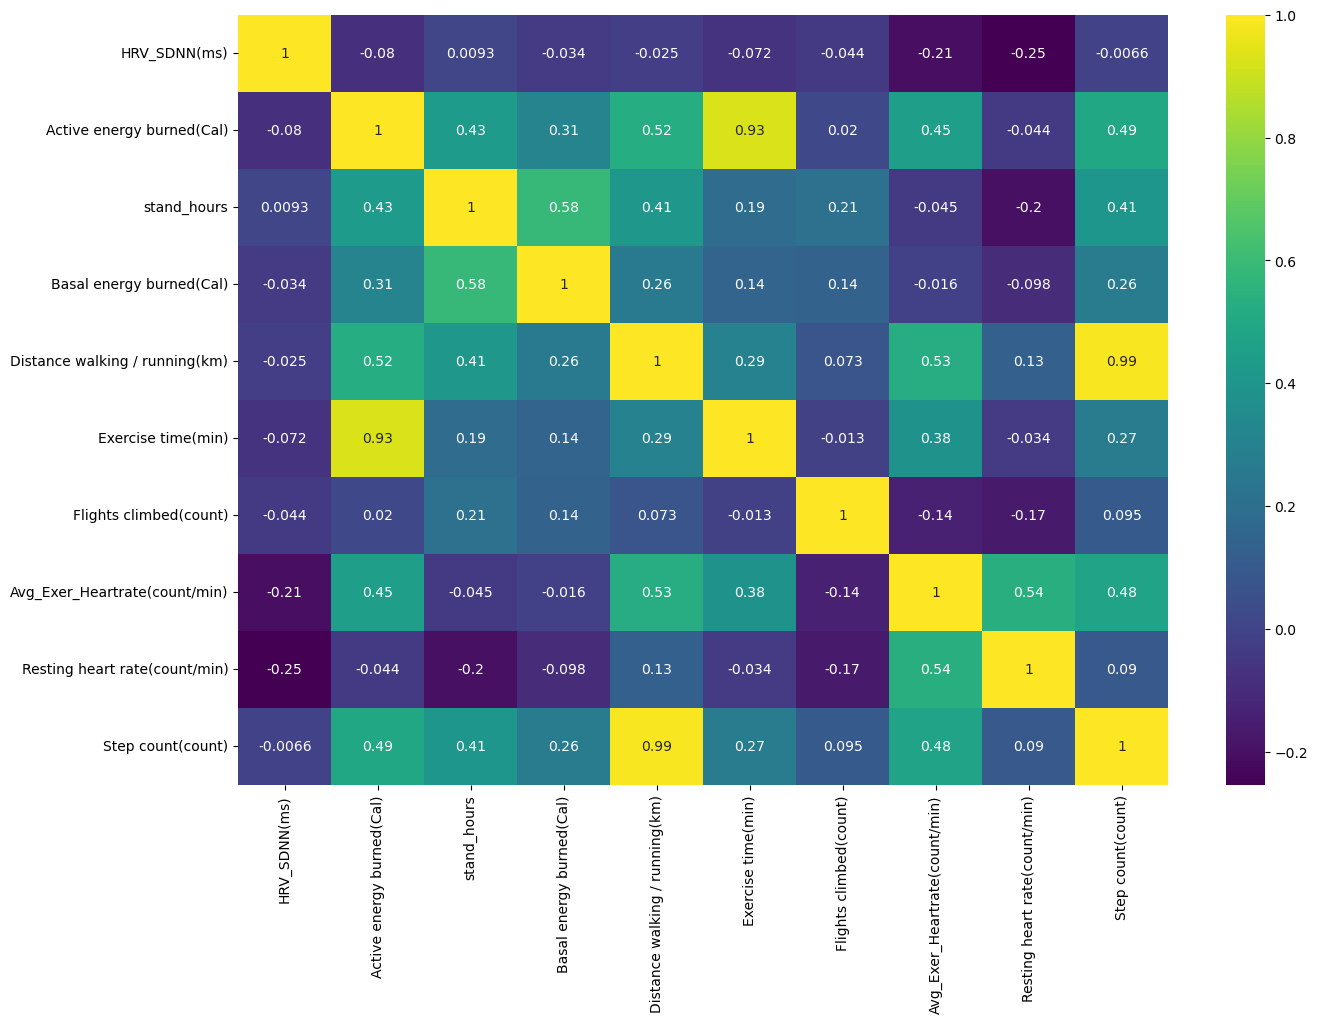

In [47]:
#Check the multicolinearity using a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(activity_hrv_df[num_cols].corr(),cmap='viridis',annot=True, )

#### As we can see we can leave columns as is because there seems to be very little to no multicolinearity

#### BOXPLOTS FOR YEARS AND MONTH VS HRV 

Text(0.5, 1.0, 'YEARS VS HRV_SDNN(ms)')

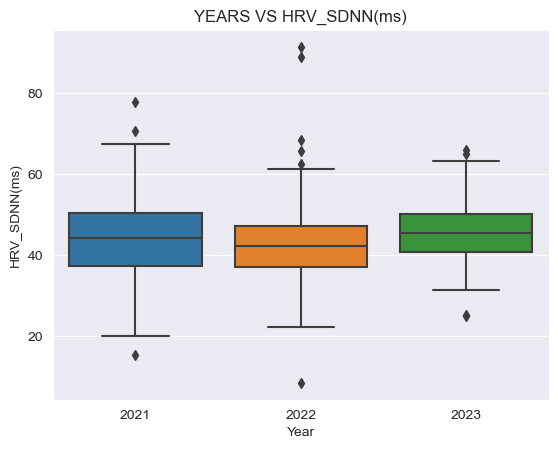

In [48]:
#YEARS VS HRV_SDNN(ms)
sns.set_style('darkgrid')
sns.boxplot(activity_hrv_df,x='Year',y='HRV_SDNN(ms)')
plt.title('YEARS VS HRV_SDNN(ms)')

Text(0.5, 1.0, 'MONTH VS HRV_SDNN(ms)')

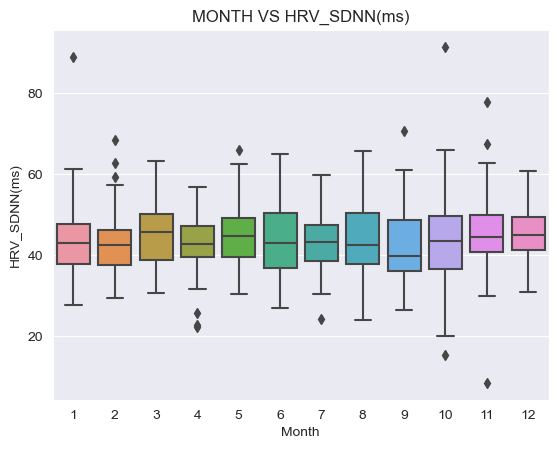

In [49]:
#MONTHS VS HRV_SDNN(ms)
sns.boxplot(x = activity_hrv_df['Month'],y= activity_hrv_df['HRV_SDNN(ms)'])
plt.title('MONTH VS HRV_SDNN(ms)')

In [50]:
activity_hrv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 1 to 723
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            695 non-null    datetime64[ns]
 1   HRV_SDNN(ms)                    695 non-null    float64       
 2   Active energy burned(Cal)       695 non-null    float64       
 3   stand_hours                     695 non-null    float64       
 4   Basal energy burned(Cal)        695 non-null    float64       
 5   Distance walking / running(km)  695 non-null    float64       
 6   Exercise time(min)              695 non-null    float64       
 7   Flights climbed(count)          695 non-null    float64       
 8   Avg_Exer_Heartrate(count/min)   695 non-null    float64       
 9   Resting heart rate(count/min)   695 non-null    float64       
 10  Step count(count)               695 non-null    float64       
 11  Year  

#### We can also see that step count and distance walking have very high correlation it may be best to remove one of those features to reduce the prevalence of multicolinearity which afftects mostly regression models making it hard to dilineate the two features

In [51]:
activity_df.columns

Index(['Date', 'Active energy burned(Cal)', 'Apple Watch stand hours(hr)',
       'Basal energy burned(Cal)', 'Distance walking / running(km)',
       'Exercise time(min)', 'Flights climbed(count)', 'Heart rate(count/min)',
       'Resting heart rate(count/min)', 'Stand time(min)', 'Step count(count)',
       'Walking heart rate average(count/min)'],
      dtype='object')

In [52]:
cols = ['Date','Year','']

In [53]:
activity_hrv_df = activity_hrv_df.drop(columns='Step count(count)')

## Statistical Hypothesis testing

#### Explore the Distribution of HRV for Each year

<Axes: xlabel='HRV_SDNN(ms)', ylabel='Count'>

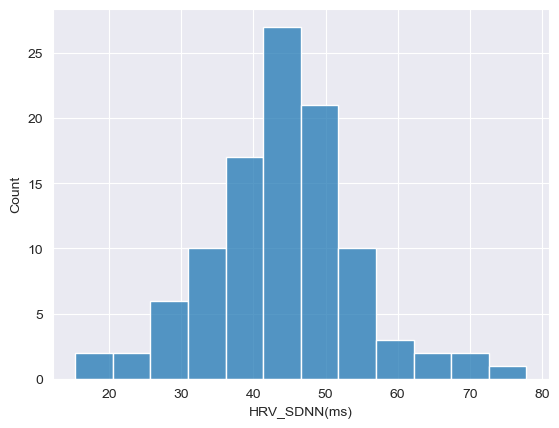

In [54]:
sns.histplot(activity_hrv_df['HRV_SDNN(ms)'][activity_hrv_df['Year']==2021])

<Axes: xlabel='HRV_SDNN(ms)', ylabel='Count'>

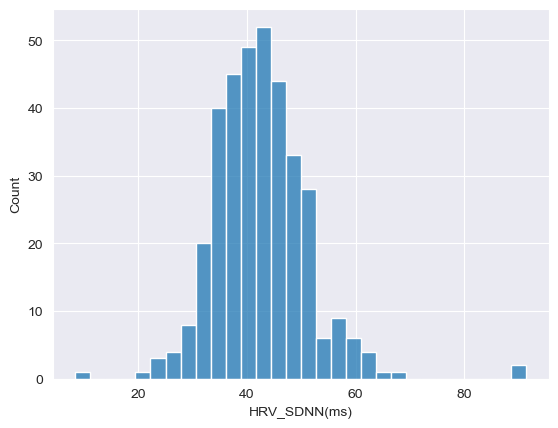

In [55]:
sns.histplot(activity_hrv_df['HRV_SDNN(ms)'][activity_hrv_df['Year']==2022])

<Axes: xlabel='HRV_SDNN(ms)', ylabel='Count'>

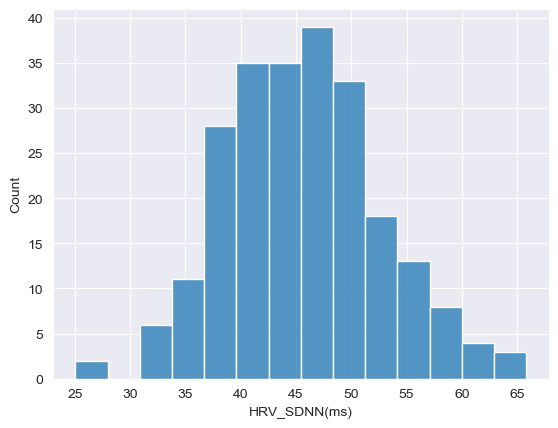

In [56]:
sns.histplot(activity_hrv_df['HRV_SDNN(ms)'][activity_hrv_df['Year']==2023])

In [57]:
#Two sided paired t-test comparing 20 sample HRV readings btw 2022 and 2023

#get 20 randomn HRV samples from 2021
rand_HRV2021 = activity_hrv_df['HRV_SDNN(ms)'][activity_hrv_df['Year'] == 2021].sample(20,random_state=101)

#get 20 randomn HRV samples from 2022
rand_HRV2022 = activity_hrv_df['HRV_SDNN(ms)'][activity_hrv_df['Year'] == 2022].sample(20,random_state=101)

#get 20 randomn HRV samples from 2023
rand_HRV2023 = activity_hrv_df['HRV_SDNN(ms)'][activity_hrv_df['Year'] == 2023].sample(20,random_state=101)


In [58]:
from scipy import stats

In [59]:
#Comparing 2022 with 2023
stats.ttest_ind(rand_HRV2022,rand_HRV2023,alternative='two-sided')

Ttest_indResult(statistic=-0.11513221646122987, pvalue=0.9089465632297312)

### Analysis of the paired T-test

#### H0 : mean HRV 2022 = mean HRV 2023
#### Ha : mean HRV 2022 != mean HRV 2023 two tailed
#### confidence interval = 95%

pvalue > 0.05(alpha) ; this indicates that we do not have enough evidence reject the null hypothesis
pvalue > 0.1 this also shows that the results are not statistically significant

In [60]:
#Comparing 2021 with 2022
stats.ttest_ind(rand_HRV2021,rand_HRV2022,alternative='two-sided')

Ttest_indResult(statistic=0.7511370343184622, pvalue=0.4571969265496273)

### Analysis of the paired T-test

#### H0 : mean HRV 2021 = mean HRV 2022
#### Ha : mean HRV 2021 != mean HRV 2022 two tailed
#### confidence interval = 95%

pvalue > 0.05(alpha) ; this indicates that we do not have enough evidence reject the null hypothesis
pvalue > 0.1 this also shows that the results are not statistically significant

In [61]:
#Comparing 2021 with 2023
stats.ttest_ind(rand_HRV2021,rand_HRV2023,alternative='two-sided')

Ttest_indResult(statistic=0.7344101940158224, pvalue=0.46720668122311315)

### Analysis of the paired T-test

#### H0 : mean HRV 2021 = mean HRV 2022
#### Ha : mean HRV 2021 != mean HRV 2022 two tailed
#### confidence interval = 95%

pvalue > 0.05(alpha) ; this indicates that we do not have enough evidence reject the null hypothesis
pvalue > 0.1 this also shows that the results are not statistically significant

## Modeling (Decision Trees, Linear Regression, Randomn Forrest and Neural Networks)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [63]:
X = activity_hrv_df.drop(columns=['Date','HRV_SDNN(ms)'])
y = activity_hrv_df['HRV_SDNN(ms)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=101)

In [64]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [65]:
#Predicting the values 
dtree_pred = dtree.predict(X_test)

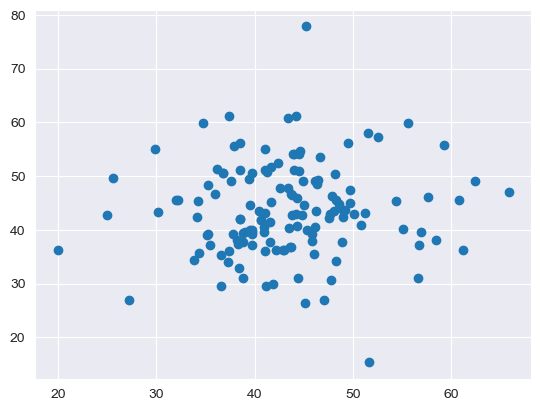

In [66]:
plt.scatter(y_test,dtree_pred)

In [67]:
from sklearn import metrics

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, dtree_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtree_pred)))
print("R-squared:", metrics.r2_score(y_test,dtree_pred))

MAE: 8.322032717961495
MSE: 120.68269192086458
RMSE: 10.98556743736365
R-squared: -1.1698183798978605


### Randomn forrest Regressor Model

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [70]:
rf = RandomForestRegressor()

In [71]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error'))

-6.679280110328422

In [72]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error'))

# tune models GridsearchCV 
parameters = {'n_estimators':range(10,300,10), 'criterion':['absolute_error'], 'max_features':('sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=5)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_


RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=90)

In [73]:
#Predicting the values 
tpred_rfc = gs.predict(X_test)

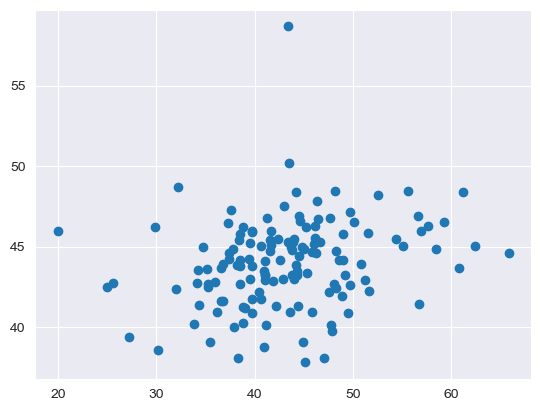

In [74]:
plt.scatter(y_test,tpred_rfc)

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, tpred_rfc))
print('MSE:', metrics.mean_squared_error(y_test, tpred_rfc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tpred_rfc)))
print("R-squared:", metrics.r2_score(y_test,tpred_rfc))

MAE: 5.607446842751129
MSE: 54.165802598290604
RMSE: 7.359742019819078
R-squared: 0.026124192549845326


### Linear Regression Model

In [76]:
X = activity_hrv_df.drop(columns=['Date','HRV_SDNN(ms)'])
y = activity_hrv_df['HRV_SDNN(ms)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=101)

In [77]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_predictions = lm.predict(X_test)

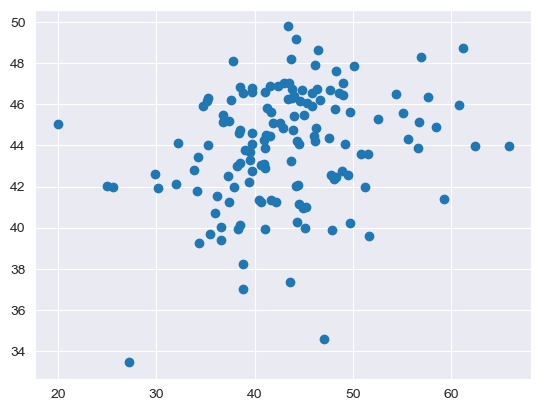

In [78]:
plt.scatter(y_test,lm_predictions)

### Evaluation of linear regression model

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))
print("R-squared:", metrics.r2_score(y_test,lm_predictions))

MAE: 5.649295156485472
MSE: 53.260257581662586
RMSE: 7.297962563733976
R-squared: 0.04240546859390981


In [80]:
#Checking the coefficients of each variabe to see how a change in each variable affects HRV(SDNN)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Active energy burned(Cal),-0.008916
stand_hours,0.105146
Basal energy burned(Cal),-0.000853
Distance walking / running(km),0.617606
Exercise time(min),0.041894
Flights climbed(count),-0.211909
Avg_Exer_Heartrate(count/min),-0.095505
Resting heart rate(count/min),-0.444906
Year,0.986345
Month,0.337294


In [81]:
##Lets try removing year and month 

In [82]:
X = activity_hrv_df.drop(columns=['Date','HRV_SDNN(ms)','Month','Year'])
y = activity_hrv_df['HRV_SDNN(ms)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=101)

In [83]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_predictions = lm.predict(X_test)

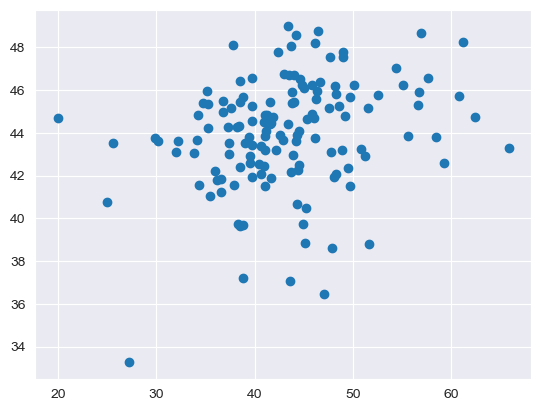

In [84]:
plt.scatter(y_test,lm_predictions)

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))
print("R-squared:", metrics.r2_score(y_test,lm_predictions))

MAE: 5.606759847805522
MSE: 53.084735473328955
RMSE: 7.285927221248436
R-squared: 0.04556127404271837


In [86]:
#Checking the coefficients of each variabe to see how a change in each affects HRV(SDNN)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Active energy burned(Cal),-0.009454
stand_hours,0.076942
Basal energy burned(Cal),-0.000818
Distance walking / running(km),0.667018
Exercise time(min),0.043054
Flights climbed(count),-0.163175
Avg_Exer_Heartrate(count/min),-0.082792
Resting heart rate(count/min),-0.479975


### Neural Network

In [87]:
#When working with neural networks try to normalize and scale your feature data NEXT TO AVOID ANY ISSUES 
#you dont need to scale the label because it does not go into the neural network anf isnt multiplied by 
#the weights and biases
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()

In [89]:
#fit scaler to training data
#calcualtes the parameters needed for scaling , hence calculating std dev, min and max 

#we do it to training set only to avoid data leakage "cheating"
scaler.fit(X_train)

MinMaxScaler()

In [90]:
#transform training data and test data 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [92]:
X_train.shape

(556, 8)

In [93]:
X_test.shape

(139, 8)

In [94]:
model = Sequential()
#layers in neural network 3 hidden layers
#input layer
model.add(Dense(11,activation='relu'))

#hidden layers
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))

#output layer one nueron bacoause of what we are trying to predict
#no activation function because we want to predict HRV
model.add(Dense(1))

In [95]:
#optimize the models gradient descent using the optimizer argument for example the ADAM
model.compile(optimizer='adam',loss='mae')

In [96]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),
          validation_batch_size=128,epochs=300)

Epoch 1/300
18/18 [==============================] - 0s 6ms/step - loss: 43.9856 - val_loss: 43.0481
Epoch 2/300
18/18 [==============================] - 0s 2ms/step - loss: 43.7499 - val_loss: 42.8132
Epoch 3/300
18/18 [==============================] - 0s 2ms/step - loss: 43.4692 - val_loss: 42.4458
Epoch 4/300
18/18 [==============================] - 0s 2ms/step - loss: 42.9876 - val_loss: 41.7684
Epoch 5/300
18/18 [==============================] - 0s 1ms/step - loss: 42.0198 - val_loss: 40.3375
Epoch 6/300
18/18 [==============================] - 0s 2ms/step - loss: 40.0072 - val_loss: 37.4325
Epoch 7/300
18/18 [==============================] - 0s 2ms/step - loss: 35.9512 - val_loss: 31.5461
Epoch 8/300
18/18 [==============================] - 0s 2ms/step - loss: 27.9601 - val_loss: 20.4481
Epoch 9/300
18/18 [==============================] - 0s 2ms/step - loss: 14.5443 - val_loss: 8.0180
Epoch 10/300
18/18 [==============================] - 0s 2ms/step - loss: 8.8333 - val_loss:

Epoch 83/300
18/18 [==============================] - 0s 1ms/step - loss: 6.5552 - val_loss: 5.4223
Epoch 84/300
18/18 [==============================] - 0s 1ms/step - loss: 6.5587 - val_loss: 5.3497
Epoch 85/300
18/18 [==============================] - 0s 1ms/step - loss: 6.5700 - val_loss: 5.5031
Epoch 86/300
18/18 [==============================] - 0s 1ms/step - loss: 6.5233 - val_loss: 5.4982
Epoch 87/300
18/18 [==============================] - 0s 1ms/step - loss: 6.5090 - val_loss: 5.4821
Epoch 88/300
18/18 [==============================] - 0s 1ms/step - loss: 6.5015 - val_loss: 5.5212
Epoch 89/300
18/18 [==============================] - 0s 1ms/step - loss: 6.5065 - val_loss: 5.3651
Epoch 90/300
18/18 [==============================] - 0s 1ms/step - loss: 6.5442 - val_loss: 5.5000
Epoch 91/300
18/18 [==============================] - 0s 1ms/step - loss: 6.4970 - val_loss: 5.4196
Epoch 92/300
18/18 [==============================] - 0s 1ms/step - loss: 6.4855 - val_loss: 5.5182


18/18 [==============================] - 0s 1ms/step - loss: 6.3682 - val_loss: 5.4779
Epoch 165/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3883 - val_loss: 5.4353
Epoch 166/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3924 - val_loss: 5.6620
Epoch 167/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3776 - val_loss: 5.4728
Epoch 168/300
18/18 [==============================] - 0s 1ms/step - loss: 6.4160 - val_loss: 5.7466
Epoch 169/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3913 - val_loss: 5.4278
Epoch 170/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3687 - val_loss: 5.6957
Epoch 171/300
18/18 [==============================] - 0s 1ms/step - loss: 6.4058 - val_loss: 5.4833
Epoch 172/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3859 - val_loss: 5.4141
Epoch 173/300
18/18 [==============================] - 0s 1ms/step - loss: 6.4644 - val_loss: 5.5551
Epoc

18/18 [==============================] - 0s 1ms/step - loss: 6.3544 - val_loss: 5.4566
Epoch 246/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3501 - val_loss: 5.5865
Epoch 247/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3485 - val_loss: 5.5124
Epoch 248/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3900 - val_loss: 5.6000
Epoch 249/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3715 - val_loss: 5.4759
Epoch 250/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3620 - val_loss: 5.5094
Epoch 251/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3467 - val_loss: 5.4776
Epoch 252/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3936 - val_loss: 5.7510
Epoch 253/300
18/18 [==============================] - 0s 1ms/step - loss: 6.4112 - val_loss: 5.4828
Epoch 254/300
18/18 [==============================] - 0s 1ms/step - loss: 6.3929 - val_loss: 5.4604
Epoc

<Axes: >

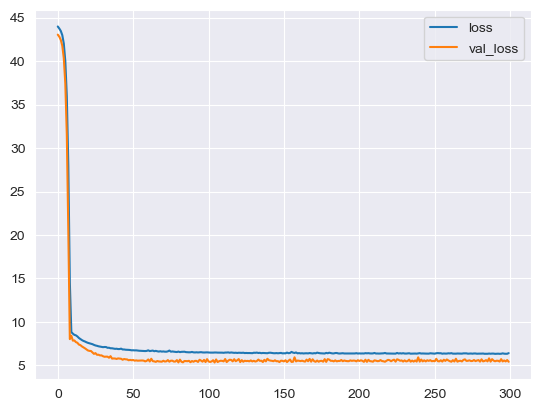

In [97]:
loss_df = pd.DataFrame(model.history.history)
#to determine the amount of epochs needed for minimum loss and to see if model overfits
loss_df.plot()

In [98]:
#Neural Network Model prediction
nn_predictions = model.predict(X_test)

5/5 [==============================] - 0s 969us/step


In [99]:
#Creating a dataframe of original y values vs predicted values

test_predictions = pd.DataFrame(nn_predictions)

pred_df = pd.DataFrame(y_test.values,columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df.head(10)

,Test True Y,Model Predictions
0,38.298667,39.030197
1,43.442429,42.621460
2,39.765400,45.613728
3,41.108600,41.449413
4,43.807875,43.758667
5,51.571167,44.909534
6,40.700273,40.958179
7,38.829375,37.770477
8,34.741667,43.475906
9,48.310167,40.761715


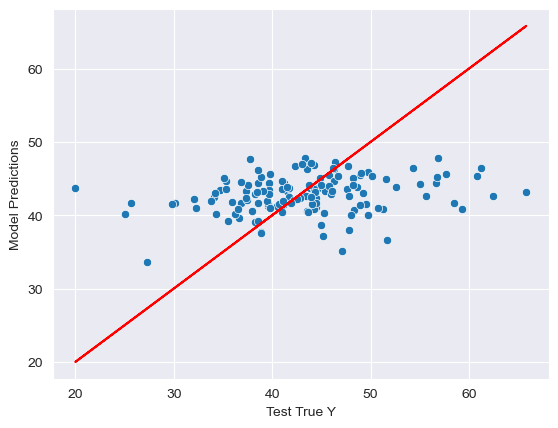

In [100]:
##lets plot the predictions to the original y values
sns.scatterplot(x='Test True Y', y= 'Model Predictions',data=pred_df)

#adding in the line that would represent perfect prediction
plt.plot(y_test,y_test,'r')

In [101]:
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))
print("R-squared:", metrics.r2_score(y_test, test_predictions))

MAE: 5.416656577770907
MSE: 52.905712833306765
RMSE: 7.27363133746183
R-squared: 0.048780017414739696


### Evaluating a combination of the linear regression and neural network

In [102]:
nn_predictions.shape

(139, 1)

In [103]:
nn_predictions = nn_predictions.reshape((139,))
nn_predictions.shape

(139,)

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test.values, (lm_predictions+nn_predictions)/2))
print('MSE:', metrics.mean_squared_error(y_test.values, (lm_predictions+nn_predictions)/2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test.values, (lm_predictions+nn_predictions)/2)))
print("R-squared:", metrics.r2_score(y_test, (lm_predictions+nn_predictions)/2))

MAE: 5.462007722418992
MSE: 52.46991680515954
RMSE: 7.243612137957108
R-squared: 0.056615426260114066


In [105]:
sleep_hrv_act_df['HRV_SDNN(ms)'].mean()

43.85859786293245

### CONCLUSION

**LIMITATIONS:**

One primary limitation of this analysis was the insufficient amount of data available for training the model; with only approximately 700 observations, our foundation was relatively narrow. To address this, I plan to revisit and refine the analysis once we accumulate more data.

Additionally, the absence of sleep data posed a constraint, especially considering the established correlation between sleep and enhanced recovery, which subsequently influences HRV (SDNN) readings.

Given these findings and insights, I am motivated to modify my routine to incorporate more walking and running exercises, anticipating a potential improvement in my HRV over time.